In [50]:
# 300개의 이미지를 다운받아서 model훈련시켜서 예측
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from PIL import Image
import os,glob


이미지 다운로드 링크
http://www.vision.caltech.edu/datasets/

In [51]:
caltech_dir = 'image/101_ObjectCategories'
categories = ['chair','camera','butterfly','elephant','flamingo']
nb_classes = len(categories)
nb_classes

5

In [52]:
# 이미지 지정
image_w = 64
image_h = 64

이미지 불러와서 숫자변환

In [53]:
# 이미지 불러오기
X = []
Y = []
label=0
# 5개 - idx : 0,1,2,3,4  cat : 'chair','camera','butterfly','elephant','flamingo'
for idx,cat in enumerate(categories):
    # image/101_ObjectCategories/chair/
    image_dir = caltech_dir+'/'+cat
    files = glob.glob(image_dir+'/*.jpg') # chair: 62개, camera:50개...
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("L")
        img = img.resize((64,64))
        # img = img.resize((image_w,image_h))
        data = np.asarray(img)
        # X list에 담기
        X.append(data)
        # Y list에 담기 - label
        # 0-chair,1-camera,2-butterfly,3-elephant,4-flamingo
        Y.append(label) 
    # label의 값 : 0-4
    label += 1 

X = np.array(X)
Y = np.array(Y)  

print(X[:2])
print(Y)      

[[[253 255 255 ... 255 255 255]
  [253 237 227 ... 255 255 255]
  [247 150 127 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [253 217  62 ...  30  32 154]
  [251 252 233 ...  36 140 253]
  [254 254 255 ... 205 253 255]]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4


In [54]:
# (64,64,1) reshape이 되어야 함.
X.shape

(334, 64, 64)

In [55]:
# 1차원 행렬의 되어야 함.
Y.shape

(334,)

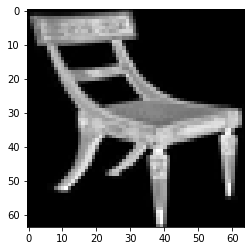

In [56]:
plt.imshow(X[0],cmap='gray_r')
plt.show()

334개 이미지 npy로 저장

In [57]:
# X_train,X_test,y_train,y_test로 numpy저장
X_train,X_test,y_train,y_test = train_test_split(X,Y)
xy = (X_train,X_test,y_train,y_test)
np.save('./image/5obj.npy',xy) # 변환된 이미지 모두 numpy파일로 저장
print("save Ok",len(Y))

save Ok 334


npy 불러오기

In [58]:
# allow_pickle=True 넣을것 334-250,84
# mnist형태와 동일
X_train,X_test,y_train,y_test = np.load('image/5obj.npy',allow_pickle=True)
print(X_train.shape,X_test.shape)

(250, 64, 64) (84, 64, 64)


3차원 행렬 변환

In [59]:
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)
X_train.shape,X_test.shape

((250, 64, 64, 1), (84, 64, 64, 1))

In [60]:
X_train = X_train/255.0  #.0실수형타입
X_test = X_test/255.0

딥러닝 시작부분
* input_shape : 크기 설정
* label : 1차원 행렬

In [61]:
# 합성곱 신경망 선언
model = keras.Sequential()

# CNN
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(64,64,1)))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))

# CNN - 1회 반복
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))

In [62]:
# 인공신경망의 선언
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 100)              

딥러닝 설정

In [63]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
check_cb = keras.callbacks.ModelCheckpoint('cnn-test.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

딥러닝 훈련

In [68]:
history = model.fit(X_train,y_train,epochs=100,batch_size=64,\
    validation_data=(X_test,y_test),callbacks=[check_cb,early_cb])

Epoch 1/100
4/4 [==============================] - 1s 137ms/step - loss: 1.4681 - accuracy: 0.3960 - val_loss: 1.4996 - val_accuracy: 0.4643
Epoch 2/100
4/4 [==============================] - 0s 131ms/step - loss: 1.4285 - accuracy: 0.4240 - val_loss: 1.4961 - val_accuracy: 0.4167
Epoch 3/100
4/4 [==============================] - 0s 132ms/step - loss: 1.4174 - accuracy: 0.4280 - val_loss: 1.4826 - val_accuracy: 0.3929
Epoch 4/100
4/4 [==============================] - 1s 138ms/step - loss: 1.3425 - accuracy: 0.4960 - val_loss: 1.4388 - val_accuracy: 0.4881
Epoch 5/100
4/4 [==============================] - 0s 119ms/step - loss: 1.3781 - accuracy: 0.4360 - val_loss: 1.5281 - val_accuracy: 0.4286
Epoch 6/100
4/4 [==============================] - 0s 124ms/step - loss: 1.3966 - accuracy: 0.4280 - val_loss: 1.4722 - val_accuracy: 0.4524
Epoch 7/100
4/4 [==============================] - 0s 119ms/step - loss: 1.3437 - accuracy: 0.4720 - val_loss: 1.4721 - val_accuracy: 0.4643
Epoch 8/100
4

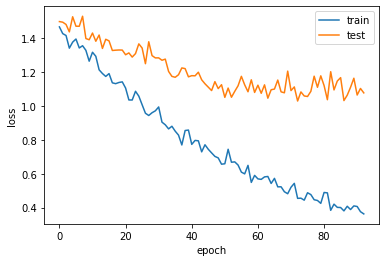

In [69]:
# train_data,test_data loss 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [71]:
# 정확도
score = model.evaluate(X_test,y_test)
print("loss, accuracy : ",score)

3/3 [==============================] - 0s 12ms/step - loss: 1.0301 - accuracy: 0.7143
loss, accuracy :  [1.0300527811050415, 0.7142857313156128]
